In [29]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import glob

In [30]:
# 画像を読み込み、グレースケールに変換
image_path = '../data/sample2.jpg'
image = Image.open(image_path).convert('L')

# 画像をnumpy配列に変換
image_array = np.array(image)

# ピクセル値は黒0、白255

In [31]:
# 画像サイズの確認
image_array.shape

(480, 640)

In [32]:
# しきい値を設定
threshold = 200

# しきい値よりも濃い（暗い）ピクセルの数をカウント
dark_pixels = np.sum(image_array < threshold)

# 全体のピクセル数を取得
total_pixels = image_array.size

# 濃いピクセルの割合を計算
dark_pixel_ratio = dark_pixels / total_pixels

print(f'濃いピクセルの割合: {dark_pixel_ratio:.2%}')

濃いピクセルの割合: 42.26%


In [33]:
# 各ピクセル値の出現数をカウント
pixel_counts = np.bincount(image_array.flatten(), minlength=256)

# 結果を表示
for value, count in enumerate(pixel_counts):
    # ピクセル値0は除外
    if count != 0:
        print(f'ピクセル値 {value}: {count}個')

ピクセル値 0: 791個
ピクセル値 1: 635個
ピクセル値 2: 144個
ピクセル値 3: 63個
ピクセル値 4: 48個
ピクセル値 5: 18個
ピクセル値 6: 21個
ピクセル値 7: 14個
ピクセル値 8: 13個
ピクセル値 9: 11個
ピクセル値 10: 10個
ピクセル値 11: 13個
ピクセル値 12: 14個
ピクセル値 13: 18個
ピクセル値 14: 9個
ピクセル値 15: 7個
ピクセル値 16: 9個
ピクセル値 17: 10個
ピクセル値 18: 15個
ピクセル値 19: 10個
ピクセル値 20: 2個
ピクセル値 21: 5個
ピクセル値 22: 11個
ピクセル値 23: 7個
ピクセル値 24: 12個
ピクセル値 25: 20個
ピクセル値 26: 20個
ピクセル値 27: 27個
ピクセル値 28: 30個
ピクセル値 29: 40個
ピクセル値 30: 74個
ピクセル値 31: 109個
ピクセル値 32: 122個
ピクセル値 33: 148個
ピクセル値 34: 197個
ピクセル値 35: 254個
ピクセル値 36: 287個
ピクセル値 37: 378個
ピクセル値 38: 437個
ピクセル値 39: 472個
ピクセル値 40: 595個
ピクセル値 41: 742個
ピクセル値 42: 821個
ピクセル値 43: 918個
ピクセル値 44: 951個
ピクセル値 45: 999個
ピクセル値 46: 1037個
ピクセル値 47: 1092個
ピクセル値 48: 1067個
ピクセル値 49: 1070個
ピクセル値 50: 1096個
ピクセル値 51: 983個
ピクセル値 52: 1021個
ピクセル値 53: 899個
ピクセル値 54: 874個
ピクセル値 55: 831個
ピクセル値 56: 783個
ピクセル値 57: 716個
ピクセル値 58: 674個
ピクセル値 59: 614個
ピクセル値 60: 570個
ピクセル値 61: 553個
ピクセル値 62: 551個
ピクセル値 63: 484個
ピクセル値 64: 425個
ピクセル値 65: 436個
ピクセル値 66: 424個
ピクセル値 67: 426個
ピクセル値 68: 459個
ピクセ

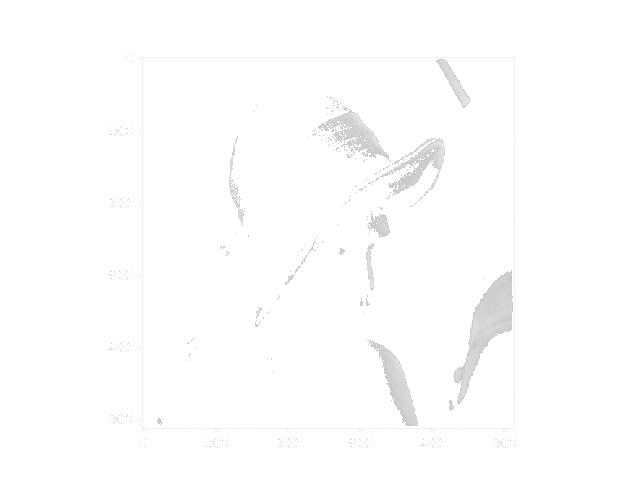

In [34]:


# 新しい画像を作成し、しきい値以上のピクセルのみを残し、他は255（白）に設定
threshold_image_array = np.where(image_array >= threshold, image_array, 255)

# numpy配列を画像に戻す
threshold_image = Image.fromarray(threshold_image_array)

# 画像を表示
threshold_image.show()

In [37]:
# 加工した画像にテキストを入れ込み保存

# ImageDrawオブジェクトを作成
draw = ImageDraw.Draw(threshold_image)

# フォントの設定（システムのデフォルトフォントを使用）
font = ImageFont.load_default()

# フォントサイズを指定します（例: 40）
# font = ImageFont.truetype("arial", 40) 

# テキストを追加する位置（x, y）を指定
position = (50, 50)

# 描画するテキスト
text = "Hello, World!"

# テキストの色（黒）
text_color = 0  

# 画像にテキストを描画
draw.text(position, text, fill=text_color, font=font)


output_path = '../data/new_sample2.jpeg'  # 保存するファイルのパスを指定してください
threshold_image.save(output_path)

In [24]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
files = glob.glob(f'{directory_path}/*.jpg')

# ファイルリストを表示
print(files)

['../data/sample2.jpg', '../data/sample1.jpg']
